In [40]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

markets = pd.read_csv('./../../data/visualization/markets_cleaned.csv')
state_populations = pd.read_csv('./../../data/visualization/census-state-populations.csv')

markets = markets.drop(['FMID'], axis=1)

markets['num_items_sold'] = markets['Bakedgoods'] + markets['Beans'] + \
    markets['Cheese'] + markets['Coffee'] +  + markets['Crafts'] + \
    markets['Eggs'] + markets['Flowers'] + markets['Fruits'] + markets['Grains'] + \
    markets['Herbs'] + markets['Honey'] + markets['Jams'] + markets['Juices'] + \
    markets['Maple'] + markets['Meat'] + markets['Mushrooms'] + markets['Nursery'] + \
    markets['Nuts'] + markets['PetFood'] + markets['Plants'] + markets['Poultry'] + \
    markets['Prepared'] + markets['Seafood'] + markets['Soap'] + markets['Tofu'] + \
    markets['Trees'] + markets['Vegetables'] + markets['WildHarvested'] + markets['Wine']

markets = markets.merge(state_populations, on='state')
markets = markets.rename(columns={'pop_est_2014': 'state_pop'})

In [41]:
# Print first three rows of data and transpose
first_rows = markets.head(3).transpose()
print(first_rows)

# Get descriptions of every column
col_descriptions = markets.describe(include = 'all',
                                percentiles = [0.5]).transpose()
print(col_descriptions)

                                                              0  \
name            Caledonia Farmers Market Association - Danville   
city                                                   Danville   
county                                                Caledonia   
state                                                   Vermont   
lat                                                  -72.140337   
lon                                                   44.411036   
months_open                                                 3.0   
Bakedgoods                                                    1   
Beans                                                         1   
Cheese                                                        1   
Coffee                                                        1   
Crafts                                                        1   
Eggs                                                          1   
Flowers                                                       

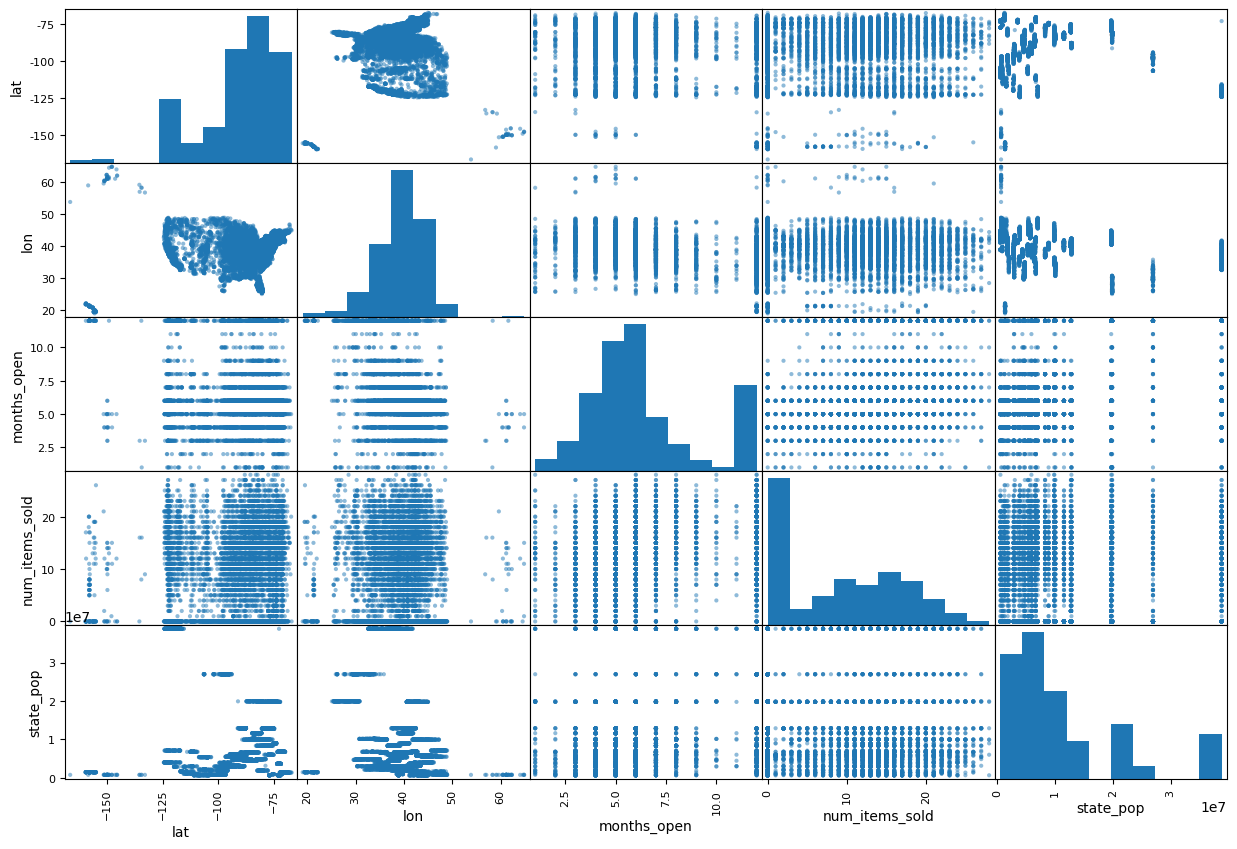

In [42]:
# Select just the numeric columns (exluding individual goods)
numeric_columns = ['lat', 'lon', 'months_open', 'num_items_sold', 'state_pop']

# Make a scatter matrix of numeric columns
pd.plotting.scatter_matrix(markets[numeric_columns], 
                             # Make figure large to show details
                             figsize = [15, 10], 
                           # Lower point opacity to show overlap
                           alpha = .5)

plt.show()

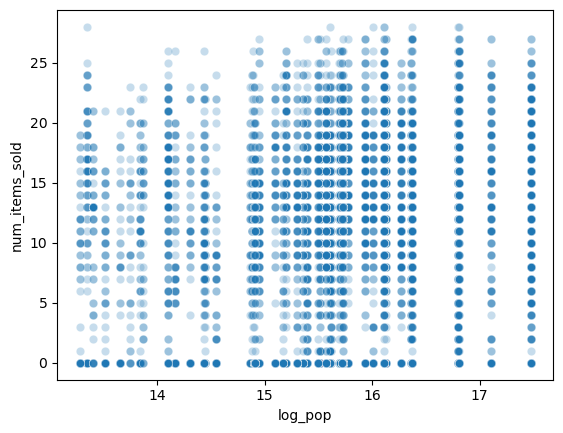

In [43]:
# Create a new logged population column 
markets['log_pop'] = np.log(markets['state_pop'])

# Draw a scatterplot of log-population to # of items sold
sns.scatterplot(x = 'log_pop', 
                  y = 'num_items_sold', 
                  # Reduce point opacity to show overlap
                  alpha = 0.25, 
                  data = markets)

plt.show()

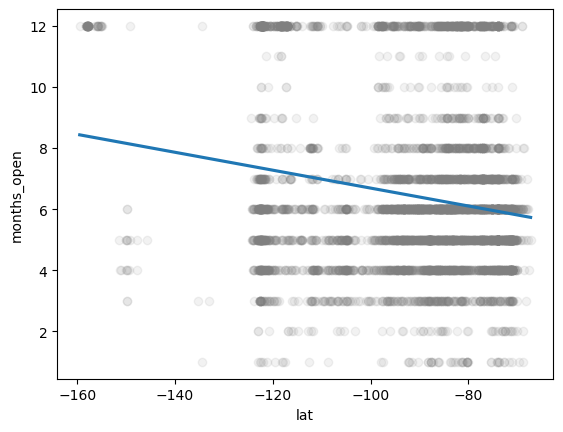

In [44]:
## Is latitude related to months open?
sns.regplot(x = 'lat', 
            y = 'months_open', 
            # Set scatter point opacity & color
            scatter_kws = {'alpha':0.1, 'color':'gray'}, 
            # Disable confidence band
            ci = False, 
            data = markets)

plt.show()

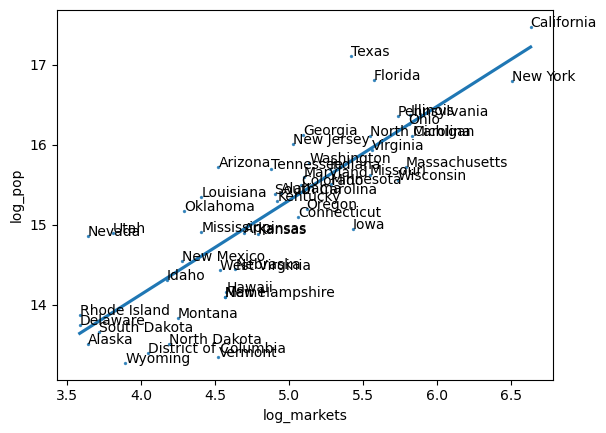

In [49]:
## What state is the most market-friendly?
from numpy import log

markets_and_pop = (markets
    .groupby('state', as_index = False)
    .agg({
       'name': lambda d: log(len(d)),
       'state_pop': lambda d: log(d.iloc[0]) })
    .rename(columns = {
        'name': 'log_markets', 
        'state_pop': 'log_pop' }))

g = sns.regplot(
    x="log_markets", y="log_pop", 
    ci = False,
    # Shrink scatter plot points
    scatter_kws = {'s':2},
    data = markets_and_pop)

# Iterate over the rows of the data
for _, row in markets_and_pop.iterrows():
    ## For some reason when I build the markets_and_pop, I only get two columns,
    ##     but datacamp gets 4.  I'm thinking there is a significant version
    ##     difference.
    #state, _, _, log_markets, log_pop = row
    
    state, log_markets, log_pop = row
    # Place annotation and reduce size for clarity
    g.annotate(state, (log_markets,log_pop), size = 10)

plt.show()

In [50]:
## NO IDEA WHERE THIS DATAFRAME COMES FROM AND FUCK THEM FOR THEIR STUPID GRADING TOOL

# Subset goods to interesting ones
to_plot = ['Cheese','Maple','Fruits','Grains','Seafood','Plants','Vegetables']
goods_by_state_small = goods_by_state.query("good in "+str(to_plot))

g = sns.scatterplot('good','prop_selling', data = goods_by_state_small,
                    # Hide scatter points by shrinking to nothing
                    s = 0)

for _,row in goods_by_state_small.iterrows():
  g.annotate(row['state'], (row['good'], row['prop_selling']), 
             # Center annotation on axis
             ha = 'center', 
             size = 10)

plt.show()

NameError: name 'goods_by_state' is not defined

In [ ]:
# Setup two stacked plots
_, (ax1, ax2) = plt.subplots(2, 1)

# Draw location scatter plot on first plot
sns.scatterplot("lon", "lat", 'months_open', 
                palette = sns.light_palette("orangered",n_colors = 12), 
                legend = False, data = markets,
                ax = ax1);

# Plot a regression plot on second plot
sns.regplot('lon', 'months_open',
            scatter_kws = {'alpha': 0.2, 'color': 'gray', 'marker': '|'},
            lowess = True,
            marker = '|', data = markets, 
            ax = ax2)

plt.show()

In [ ]:
# Set up two side-by-side plots
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 15))

# Map the column for selected states to the bar color
sns.barplot('people_per_market', 'state', hue = 'is_selected',
            # Disable dodge so bars are full size
            dodge = False, 
            data = markets_by_state, ax = ax1)

# Map selected states to point color
sns.scatterplot('log_pop', 'log_markets', hue = 'is_selected', 
                data = markets_by_state, ax = ax2, s = 100)

# Remove the legend for both plots
ax1.legend_.remove()
ax2.legend_.remove() 
plt.show() 

In [ ]:
# Set background to white with grid
sns.set_style('whitegrid')

plt.scatter('good','prop selling', marker = '_', alpha = 0.7, data = goods_by_state)

# Draw lines across goods for highlighted states
highlighted = goods_by_state.query("state in ['New Mexico','North Dakota','Vermont']")
sns.lineplot('good','prop selling', 'state', data = highlighted, legend = False)

# Draw state name at end of lines
last_rows = highlighted.groupby('state', as_index = False).agg('first')
for _,row in last_rows.iterrows():
    plt.annotate(row['state'], (row['good'], row['prop selling']),
                 ha = 'right', xytext = (5,0), textcoords = 'offset pixels')

# Remove all borders
sns.despine(bottom = True, left = True)
plt.show()

In [ ]:
# Decrease font size so state names are less crowded
sns.set(font_scale = 0.85)

# Switch to an appropriate color palette
blue_pal = sns.light_palette("steelblue", as_cmap = True)

# Order states by latitude
g = sns.heatmap(markets_by_month.reindex(state_by_lat), 
            # Add gaps between cells
            linewidths = 0.1, 
            # Set new palette and remove color bar 
            cmap = blue_pal, cbar = False,
            yticklabels = True)

# Rotate y-axis ticks 
g.set_yticklabels(g.get_yticklabels(), rotation = 0)
plt.title('Distribution of months open for farmers markets by latitude')
plt.show()

In [ ]:
# Draw barplot w/ colors mapped to state_colors vector
sns.barplot('people_per_market', 'state', palette = state_colors,
            data = markets_by_state, ax = ax1)

# Map state colors vector to the scatterplot as well
p = sns.scatterplot('population', 'num_markets', c = state_colors,
                    data = markets_by_state, s = 60, ax = ax2)

# Log the x and y scales of our scatter plot so it's easier to read
ax2.set(xscale = "log", yscale = 'log')

# Increase annotation text size for legibility
ax2.annotate(tx_message, xy = (26956958,230), 
             xytext = (26956958, 450),ha = 'right', 
             size = 15, backgroundcolor = 'white',
             arrowprops = {'facecolor':'black', 'width': 3})
sns.set_style('whitegrid')
plt.show() 